<a href="https://colab.research.google.com/github/ryosei28/ichiyasaGitSample/blob/master/21X3153_%E6%A3%AE%E6%BE%A4%E8%AB%92%E6%98%9F_%E6%A4%9C%E7%B4%A2%E6%8A%80%E8%A1%93%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Wholesale customers data.csv')


In [ ]:
display(df.head())

print(df.shape)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [ ]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
print(df['Channel'].value_counts())
print()

print(df['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64

Region
3    316
1     77
2     47
Name: count, dtype: int64


In [ ]:
df2 = df.drop(['Channel','Region'], axis = 1)

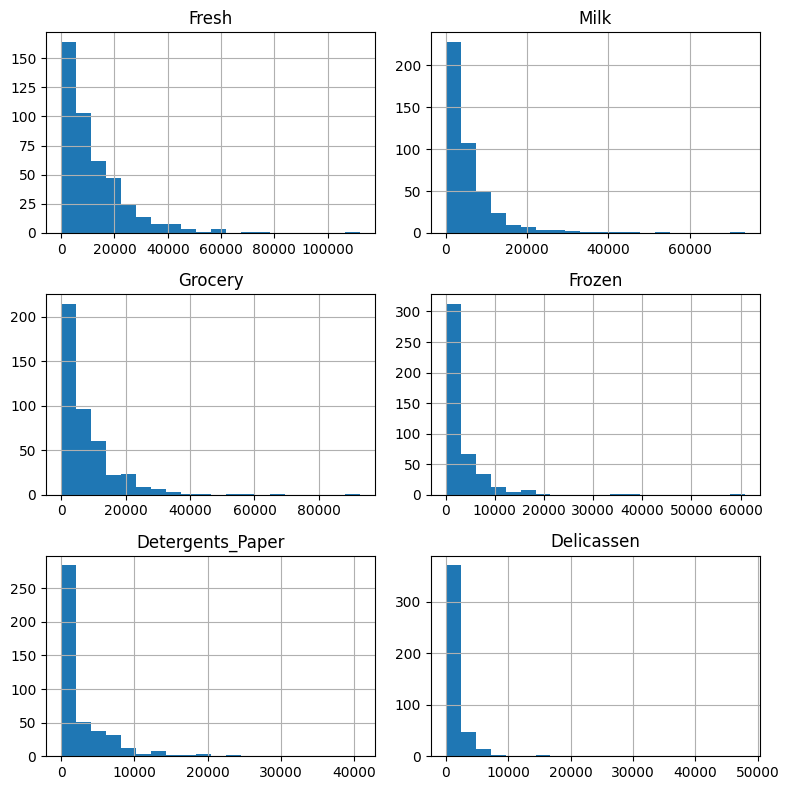

In [ ]:
rcParams['figure.figsize'] =(8,8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

clusters = 4

algorithm = KMeans(n_clusters = clusters,
                   random_state = random_seed)

In [ ]:
y_pred = algorithm.fit_predict(df2)

print(y_pred[:20])

[2 0 2 2 1 2 2 2 2 0 0 2 1 0 1 2 0 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from collections import Counter

# クラスタ番号の出現回数を数える
cluster_counts = Counter(y_pred)

# 結果を出力
for cluster, count in cluster_counts.items():
    print(f'クラスタ {cluster} の人数: {count}')

クラスタ 2 の人数: 276
クラスタ 0 の人数: 95
クラスタ 1 の人数: 58
クラスタ 3 の人数: 11


In [ ]:
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
1,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
2,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362
3,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000


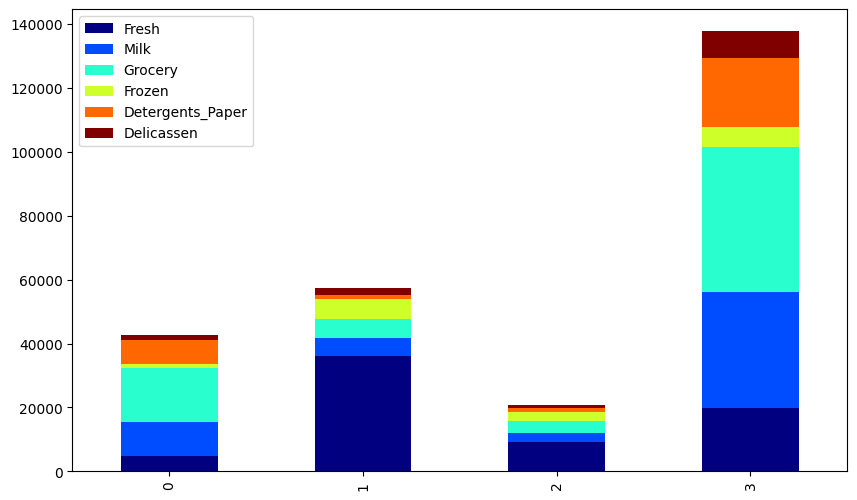

In [ ]:
df_cluster.plot(kind ='bar', stacked=True,
                figsize=(10,6),colormap ='jet')
plt.show()